# Visualize Raised Cosine Filter in Time and Frequency Domain

In [140]:
# import necessary libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Show all plots inline (not in new window)
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)
matplotlib.rcParams['font.size'] = 18

In [141]:
# Roll-off Factor:
r_values = np.array([0,0.5,1]) # has to be between 0 and 1

# Domain: 
N = 1000
t = np.linspace(-2.99, 2.99, N)
f = np.linspace(-0.99,0.99,N)

# Preallocate space needed:
t_mat = np.tile(t, [r_values.size, 1])
f_mat = np.tile(f, [r_values.size, 1])
g = np.zeros((r_values.size,N))
G = np.zeros((r_values.size,N))

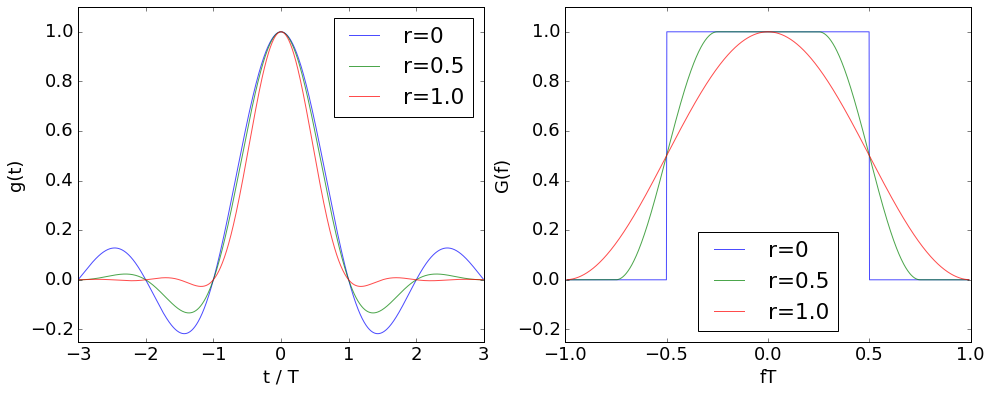

In [145]:
# Calculate impulse response and frequency response from definition:
for idx,r in enumerate(np.nditer(r_values)):
    # time domain:
    g[idx,:] = np.sinc(t)*np.cos(np.pi*t*r)/(1-np.power(2*r*t,2)) # np.sinc = sin(pi*x)/(pi*x)
    # frequency domain:
    for idx2,myf in enumerate(np.nditer(f)):
        if np.abs(myf) < (1-r)/2:
            G[idx,idx2] = 1
        elif np.abs(myf) < (1+r)/2:
            G[idx,idx2] = 0.5*(1+np.cos(np.pi/r*(np.abs(myf)-(1-r)/2)))
            
# plotting:
plt.subplot(121) # Time domain
plt.plot(np.transpose(t_mat), np.transpose(g), alpha=0.7)
plt.ylim(-0.25, 1.1)
plt.xlabel('t / T'); plt.ylabel('g(t)'); plt.legend(('r=0','r=0.5','r=1.0'))

plt.subplot(122) # Frequency Domain
plt.plot(np.transpose(f_mat), np.transpose(G), alpha=0.7)
plt.ylim(-0.25, 1.1)
plt.xlabel('fT'); plt.ylabel('G(f)'); plt.legend(('r=0','r=0.5','r=1.0'),loc=8);